<a href="https://colab.research.google.com/github/HwangHanJae/datascience-learningnote-pima_indians_diabetes/blob/main/pima_indians_transcription.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###[부스트코스 - 프로젝트로 배우는 데이터 사이언스](https://www.boostcourse.org/ds214)

###필요한 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats

####시각화를 선명하게 해주기 위한 설정

In [2]:
plt.style.use('ggplot')
set_matplotlib_formats('svg')

###EDA - Exploratory Data Analysis
- 탐색적 데이터 분석

####데이터 구성
- Pregnancies : 임신횟수
- Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
- BloodPressure : 이완기 혈압(mm Hg)
- SkinThickness : 피부 주름 두께(mm)
- Insulin : 2시간 혈청 인슐린(mu U / ml)
- BMI : 체질량 지수(체중kg / 키(m)^2)
- DiabetesPedigreeFunction : 당뇨병 혈통 기능
- Age : 나이
- Outcome : 당뇨가 아니다(0), 당뇨이다(1) 결과 값

####데이터셋 로드

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataScience/Data/pima_indians_diabetes.csv')
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#결측치 보기
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
#수치데이터에 대한 요약
df.describe()

#Glucose, BloodPressure, SkinThickness, Insulin, BMI 값이 0이 나올 수 없기 때문에 결측치라고 볼 수 있음

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
feature_columns = df.columns[0:-1].tolist()
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

####결측치 시각화


Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

Glucose          0.006510
BloodPressure    0.045573
SkinThickness    0.295573
Insulin          0.486979
BMI              0.014323
dtype: float64


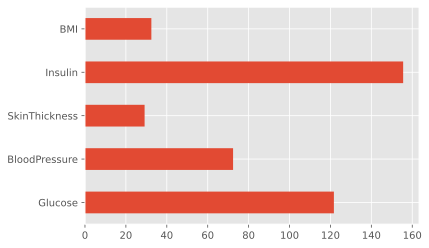

In [9]:
#결측치 시각화
cols = feature_columns[1:-2]
df_null = df[cols].replace(0,np.nan)
print(df_null.isnull().sum())
print()
print(df_null.isnull().mean())
df_null.mean().plot.barh()

#Glucose, BloodPressure, SkinThickness, Insulin, BMI 의 결측치

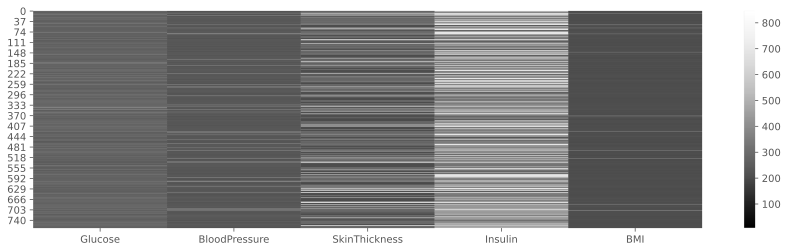

In [10]:
plt.figure(figsize=(15,4))
sns.heatmap(df_null, cmap='Greys_r')

####정답값
- target, label 이라고 부르기도 함

In [11]:
#정답값인 Outcome의 갯수를 보기
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [12]:
#정답값인 Outcome의 비율 보기
df['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [13]:
#다른 변수(임신횟수)와 함께 비교
#groupby는 index의 올값, value에 올값, 계산 방법
df_po = df.groupby(['Pregnancies'])['Outcome'].agg(['mean','count']).reset_index()
df_po

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


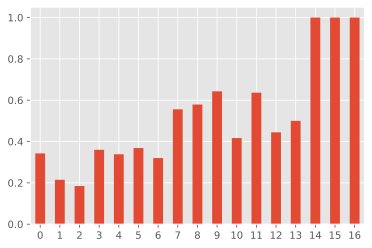

In [14]:
#임신횟수에 따른 당뇨병 발병 비율
df_po['mean'].plot.bar(rot=0)

###시각화

####countplot

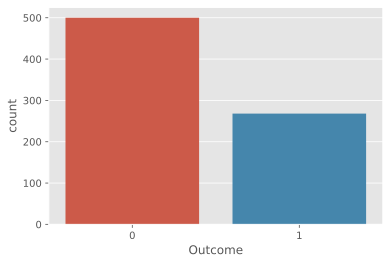

In [15]:
#위에서 구했던 당뇨병 발병 비율을 구하기
#당뇨병 발병 빈도수 비교
sns.countplot(data=df, x='Outcome')

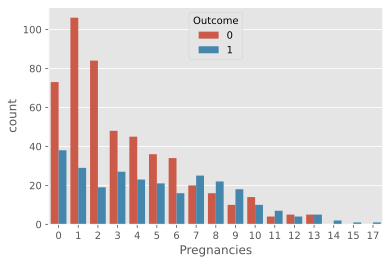

In [16]:
#임신횟수에 따른 당뇨병 발병 빈도수를 비교
sns.countplot(data=df, x='Pregnancies', hue='Outcome')

In [17]:
#임신횟수의 많고 적음에 따라 Pregnancies_high 변수를 만들기
df['Pregnancies_high']  = df['Pregnancies'] > 6
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
0,6,148,72,35,0,33.6,0.627,50,1,False
1,1,85,66,29,0,26.6,0.351,31,0,False
2,8,183,64,0,0,23.3,0.672,32,1,True
3,1,89,66,23,94,28.1,0.167,21,0,False
4,0,137,40,35,168,43.1,2.288,33,1,False


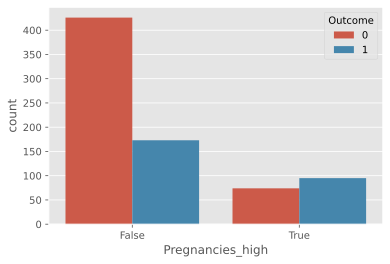

In [18]:
#Pregnancies_high 변수의 빈도수를 countplot으로 그림
#hue = 'Outcome'으로 다른 색상
sns.countplot(data=df, x='Pregnancies_high', hue='Outcome')

####barplot
- 기본 설정으로 시각화면 y축에 평균을 추정해서 그림

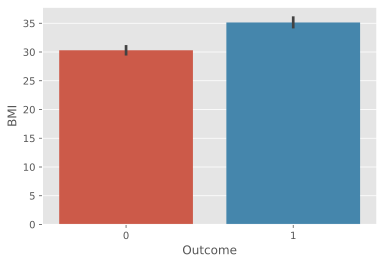

In [19]:
#당뇨병 발병에 따른 BMI 수치를 비교
sns.barplot(data=df, x='Outcome', y='BMI')

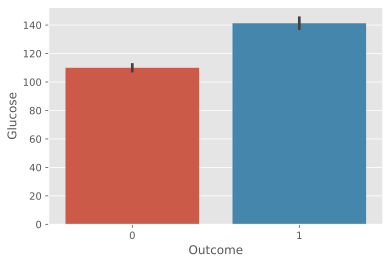

In [20]:
#당뇨병 발병에 따른 포도당(Glucose)수치를 비교
sns.barplot(data=df, x='Outcome', y='Glucose')

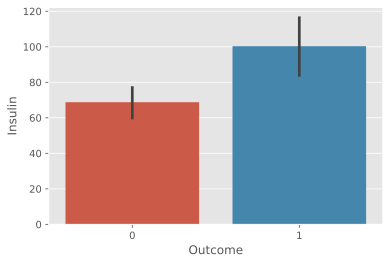

In [21]:
#Insulin 수치가 0이상인 관측치에 대해서 당뇨병 발병을 비교
sns.barplot(data=df, x='Outcome', y='Insulin')

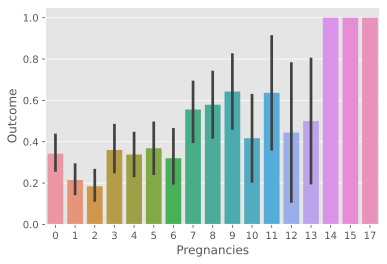

In [23]:
#임신횟수에 대해서 당뇨병 발병 비율을 비교
sns.barplot(data=df, x='Pregnancies', y='Outcome')

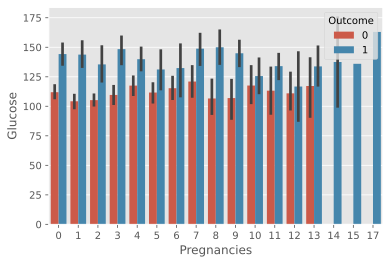

In [25]:
#임신횟수에 따른 포도당 수치를 당뇨병 발병여부에 따라 시각화
sns.barplot(data=df, x='Pregnancies', y='Glucose',hue='Outcome')

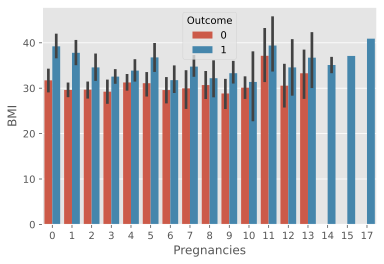

In [27]:
#임신횟수에 따른 체질량지수를 당뇨병 발병여부에 따라 시각화
sns.barplot(data=df, x='Pregnancies', y='BMI',hue='Outcome')

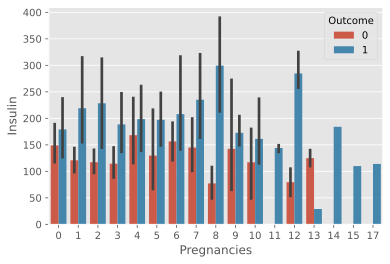

In [39]:
#임신횟수에 따른 인슐린 수치를 당뇨병 발병여부에 따라 시각화
#인슐린 수치에는 결측치(0)가 많기 때문에 0보다 큰 값에 대해서만 그림
sns.barplot(data=df[df['Insulin'] > 0],x='Pregnancies',y="Insulin",hue='Outcome')

####boxplot

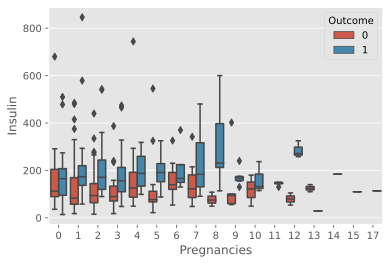

In [38]:
#임신횟수에 따른 인슐린수치를 당뇨병 발병 여부에 따라 시각화
#인슐린 수치에는 결측치가 많기 때문에 0보다 큰 값에 대해서만 그림
sns.boxplot(data=df[df['Insulin'] > 0], x='Pregnancies', y='Insulin',hue='Outcome')

####violinplot

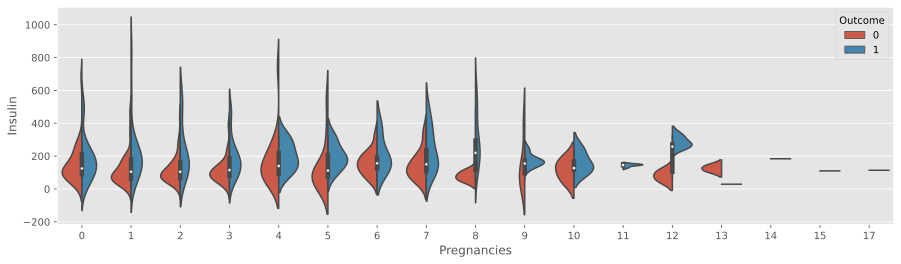

In [41]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df[df['Insulin'] > 0], x='Pregnancies', y='Insulin',hue='Outcome',split=True)

####swarmplot

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 27.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


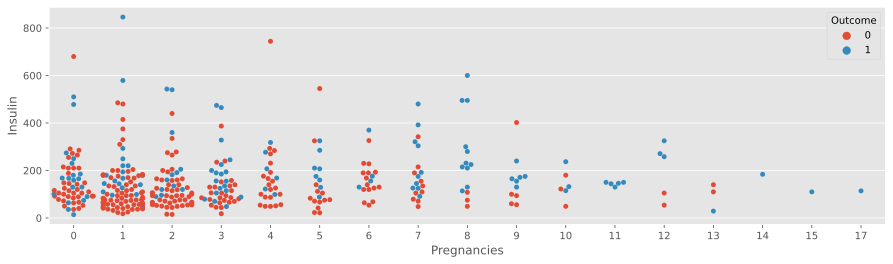

In [42]:
plt.figure(figsize=(15,4))
sns.swarmplot(data=df[df['Insulin'] > 0], x='Pregnancies', y='Insulin',hue='Outcome')

####distplot

In [48]:
df_0 = df[df['Outcome'] == 0]
df_1 = df[df['Outcome'] == 1]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


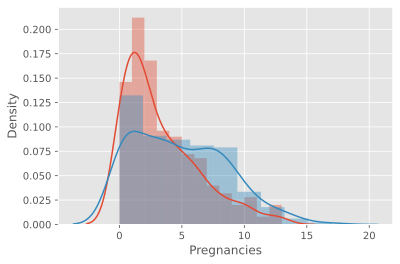

In [51]:
#임신횟수에 따른 당뇨병 발병 여부를 시각화
sns.distplot(df_0['Pregnancies'])
sns.distplot(df_1['Pregnancies'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/dis

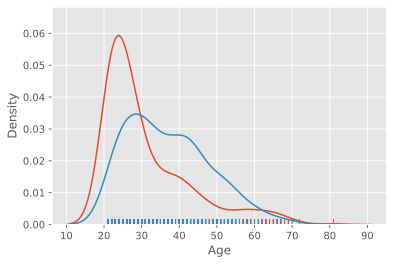

In [60]:
#나이에 따른 당뇨병 발병 여부를 시각화
sns.distplot(df_0['Age'], hist=False, rug=True, label="0")
sns.distplot(df_1['Age'], hist=False, rug=True, label="1")

####학습, 예측 데이터셋 나누기
- 가장 마지막에 있는 Outcome은 label값이기 때문에 제외

In [ ]:
#8:2의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 split_count 라는 변수에 담기
#split_count
split_count = int(df.shape[0] * 0.8)
split_count

614

In [ ]:
#train, test로 슬라이싱을 통해 데이터를 나눔
train = df[:split_count].copy()
test = df[split_count:].copy()
print(train.shape)
test.shape

(614, 9)


(154, 9)

####학습, 예측에 사용할 컬럼

In [ ]:
#feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.
feature_names = train.columns[:-1].tolist()
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

####정답값이자 예측해야 될 값

In [ ]:
#label_name 이라는 변수에 예측할 컬럼의 이름을 담기
label_name = train.columns[-1]
label_name

'Outcome'

####학습, 예측 데이터셋 만들기

In [ ]:
#학습 세트 만들기 ex) 시험의 기출문제
X_train = train[feature_names]
X_train.shape

(614, 8)

In [ ]:
#정답 값 만들기 ex) 기출문제의 정답
y_train = train[label_name]
y_train.shape

(614,)

In [ ]:
#예측에 사용할 데이터세트를 만들기 ex)실전 시험 문제
X_test = test[feature_names]
X_test.shape

(154, 8)

In [ ]:
#예측의 정답값 ex) 실전 시험 문제의 정답
y_test = test[label_name]
y_test.shape

(154,)

###머신러닝

####머신러닝 알고리즘 가져오기

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state =42)
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

####학습(훈련)
- 시험을 볼때 기출문제(X_train)와 기출문제의 정답(y_train)을 보고 공부하는 방법과 유사

In [ ]:
model.fit(X = X_train, y = y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

####예측
- 실천 시험문제(X_train)라고 보면 됩니다. 우리가 정답을 직접 예측

In [ ]:
y_pred = model.predict(X = X_test)
y_pred.shape

(154,)

####트리 알고리즘 분석
- 의사결정나무를 시각화

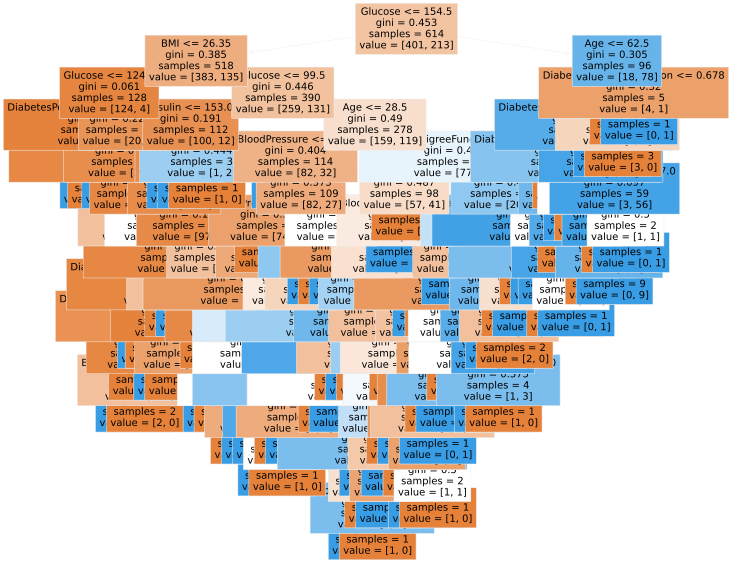

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
tree = plot_tree(decision_tree= model,
                 feature_names=feature_names,
                 filled=True,
                 fontsize=10)

In [ ]:
#graphviz로 그리기
import graphviz
from sklearn.tree import export_graphviz
dot_tree = export_graphviz(model, feature_names=feature_names, filled=True)
#graphviz.Source(dot_tree)

In [ ]:
#특성의 중요도를 추출하기
model.feature_importances_

array([0.05944171, 0.30368248, 0.13140431, 0.04020035, 0.09010707,
       0.15739296, 0.12077948, 0.09699165])

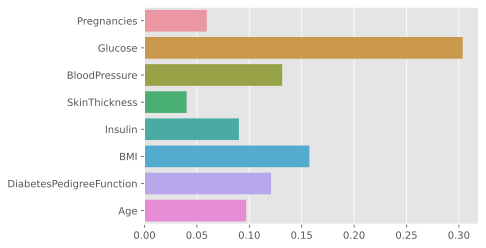

In [ ]:
#특성의 중요도 시각화 하기
sns.barplot(x=model.feature_importances_, y=feature_names)

####정확도(Accuracy)측정

In [ ]:
#실제값 - 예측값을 빼주면 같은 값은 0으로 나옴
#여기에서 절대값을 씌운 값이 1인 값이 다르게 예측한 값
diff_count = abs(y_test - y_pred).sum()
diff_count

44

In [ ]:
#예측의 정확도를 구함
#100점 만점 중에 몇점을 맞았는지 구하기
(len(y_test) - diff_count) / len(y_test) * 100

71.42857142857143

In [ ]:
#위에서 처럼 직접 구할 수 있지만 미리 구현항 알고리즘을 가져와 사용
from sklearn.metrics import accuracy_score

accuracy_score(y_true=y_test, y_pred= y_pred) * 100

0.7142857142857143

In [ ]:
#model의 score로 점수 계산
model.score(X_test, y_test) * 100

71.42857142857143